# YME Hackathon 2022
**Case 4:** Profiling Customer Through Credit Risk Assessment\
**Group 2:** S3S2'19\
**Members:** Dexter, Dongheng, Jason, Ze Li, Ming Roong\
**Formatting Style:** [PEP 8](https://peps.python.org/pep-0008/)\
**Requirements:**
```
statsmodels==0.12.2
seaborn==0.11.2
scikit-learn==1.0.2
pandas==1.3.5
numpy==1.21.6
matplotlib==3.2.2
kmodes==0.12.1
```

# Data Description

 Dataset: [South German Credit (UPDATE) Data Set](https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29), from UCI Machine Learning Repository


|Column|Variable name|Description|Level|Label|Type|
|--|--|--|--:|--|--|
|laufkont|status|status of the debtor's checking account with the bank|no checking account<br>... < 0 DM<br>0<= ... < 200 DM<br>... >= 200 DM / salary for at least 1 year|1<br>2<br>3<br>4|categorical (ordinal)|
|laufzeit|duration|credit duration in months|-|-|numerical (discrete)|
|moral|credit_history|history of compliance with previous or concurrent credit contracts|delay in paying off in the past<br>critical account/other credits elsewhere<br>no credits taken/all credits paid back duly<br>existing credits paid back duly till now<br>all credits at this bank paid back duly|0<br>1<br>2<br>3<br>4|categorical (ordinal)|
|verw|purpose|purpose for which the credit is needed|others<br>car (new)<br>car (used)<br>furniture/equipment<br>radio/television<br>domestic appliances<br>repairs<br>education<br>vacation<br>retraining<br>business|0<br>1<br>2<br>3<br>4<br>5<br>6<br>7<br>8<br>9<br>10|categorical (nominal)|
|hoehe|amount|credit amount in DM|-|-|numerical (discrete)|
|sparkont|savings|debtor's savings|unknown/no savings account<br>... <  100 DM<br>100 <= ... <  500 DM<br>500 <= ... < 1000 DM<br>... >= 1000 DM|1<br>2<br>3<br>4<br>5|categorical (ordinal)|
|beszeit|employment_duration|duration of debtor's employment with current employer|unemployed<br>< 1 yr<br>1 <= ... < 4 yrs<br>4 <= ... < 7 yrs<br>>= 7 yrs|1<br>2<br>3<br>4<br>5|categorical (ordinal)|
|rate|installment_rate|credit installments as a percentage of debtor's disposable income|>= 35<br>25 <= ... < 35<br>20 <= ... < 25<br>< 20|1<br>2<br>3<br>4|categorical (ordinal)|
|famges|personal_status_sex|combined information on sex and marital status|male : divorced/separated<br>female : non-single or male : single<br>male : married/widowed<br>female : single|1<br>2<br>3<br>4|categorical (nominal)|
|buerge|other_debtors|Is there another debtor or a guarantor for the credit?|none<br>co-applicant<br>guarantor|1<br>2<br>3|categorical (nominal)|
|wohnzeit|present_residence|length of time (in years) the debtor lives in the present residence|< 1 yr<br>1 <= ... < 4 yrs<br>4 <= ... < 7 yrs<br>>= 7 yrs|1<br>2<br>3<br>4|categorical (ordinal)|
|verm|property|the debtor's most valuable property, i.e. the highest possible code is used|unknown / no property<br>car or other<br>building soc. savings agr./life insurance<br>real estate|1<br>2<br>3<br>4|categorical (ordinal)|
|alter|age|age in years|-|-|numerical (discrete)|
|weitkred|other_installment_plans|installment plans from providers other than the credit-giving bank|bank<br>stores<br>none|1<br>2<br>3|categorical (ordinal)|
|wohn|housing|type of housing the debtor lives in|for free<br>rent<br>own|1<br>2<br>3|categorical (ordinal)|
|bishkred|number_credits|number of credits including the current one the debtor has (or had) at this bank|1<br>2-3<br>4-5<br>>= 6|1<br>2<br>3<br>4|categorical (ordinal)|
|beruf|job|quality of debtor's job|unemployed/unskilled- non-resident<br>unskilled- resident<br>skilled employee/official<br>manager/self-empl./highly qualif. employee|1<br>2<br>3<br>4|categorical (ordinal)|
|pers|people_liable|number of persons who financially depend on the debtor|3 or more<br>0 to 2|1<br>2|categorical (ordinal)|
|telef|telephone|Is there a telephone landline registered on the debtor's name?|no<br>yes (under customer name)|1<br>2|categorical (ordinal)|
|gastarb|foreign_worker|Is the debtor a foreign worker?|yes<br>no|1<br>2|categorical (ordinal)|
|kredit|credit_risk|Has the credit contract been complied with (good) or not (bad)?|bad<br>good|0<br>1|categorical (ordinal)|

# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
path = "SouthGermanCredit.asc"
columns = ['status', 'duration', 'credit_history', 'purpose', 'amount',
           'savings', 'employment_duration', 'installment_rate', 'personal_status_sex',
           'other_debtors', 'present_residence', 'property', 'age',
           'other_installment_plans', 'housing', 'number_credits', 'job',
           'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
df = pd.read_table(path, sep=' ', names=columns, header=0)


In [6]:
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [8]:
# We group all variables into 3 different categories
numerical_var = ['amount', 'duration', 'age']
nominal_categorical_var = ['purpose', 'personal_status_sex', 'other_debtors']
ordinal_categorical_var = df.columns.drop(
    numerical_var+nominal_categorical_var)


In [9]:
df.drop(columns=nominal_categorical_var).describe().T


,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
property,1000.0,2.358,1.050209,1.0,1.0,2.0,3.00,4.0
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


Text(0.5, 1.0, 'Correlation Heatmap of Ordinal and Numerical Variables')

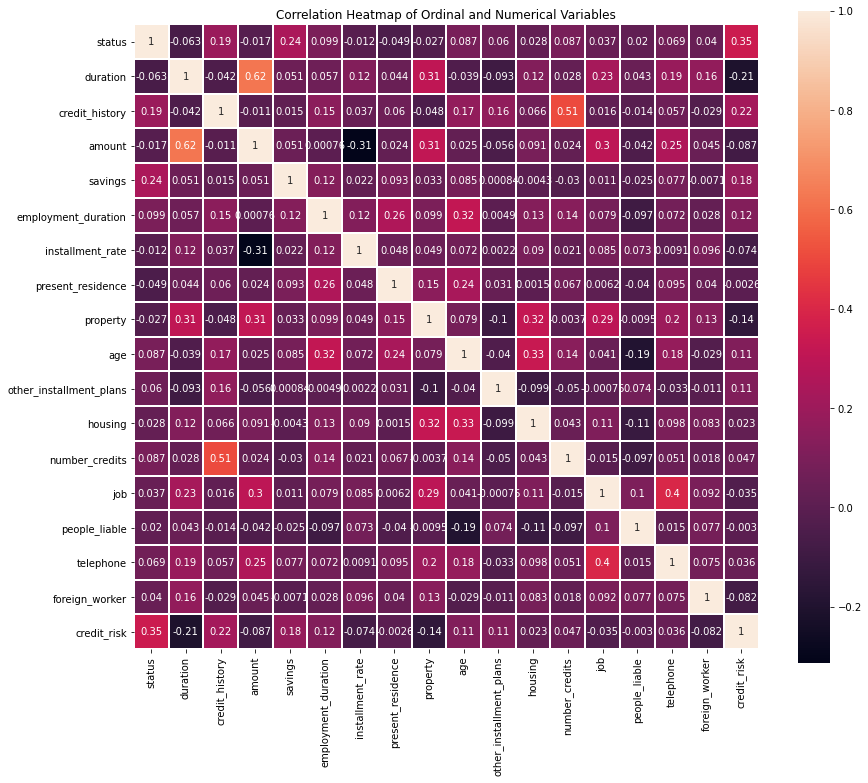

In [10]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.drop(columns=nominal_categorical_var).corr(method="spearman"), linewidths=0.1, vmax=1.0,
            square=True,  linecolor='white', annot=True).set_title("Correlation Heatmap of Ordinal and Numerical Variables")


Text(0.5, 1, 'Pairwise Scatterplots of Numerical Variables')

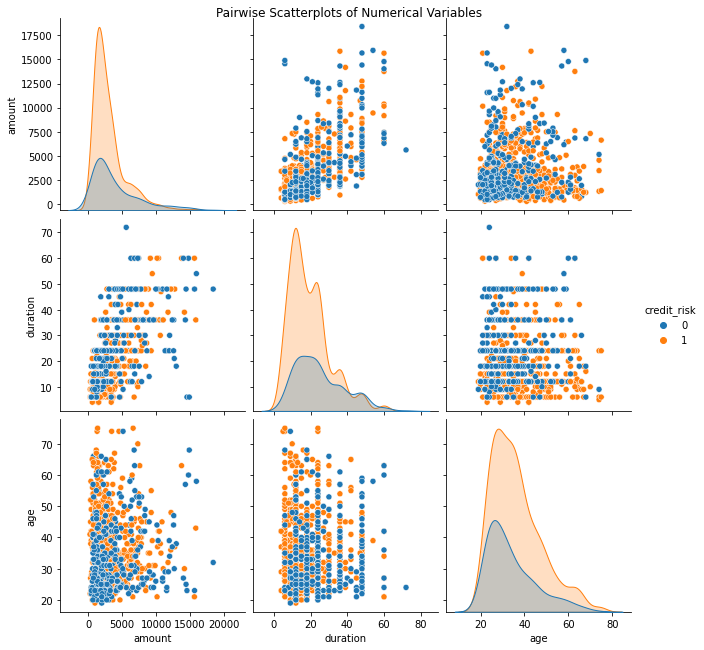

In [11]:
sns.pairplot(df[numerical_var+['credit_risk']], hue='credit_risk', height=3).fig.suptitle(
    "Pairwise Scatterplots of Numerical Variables", y=1)


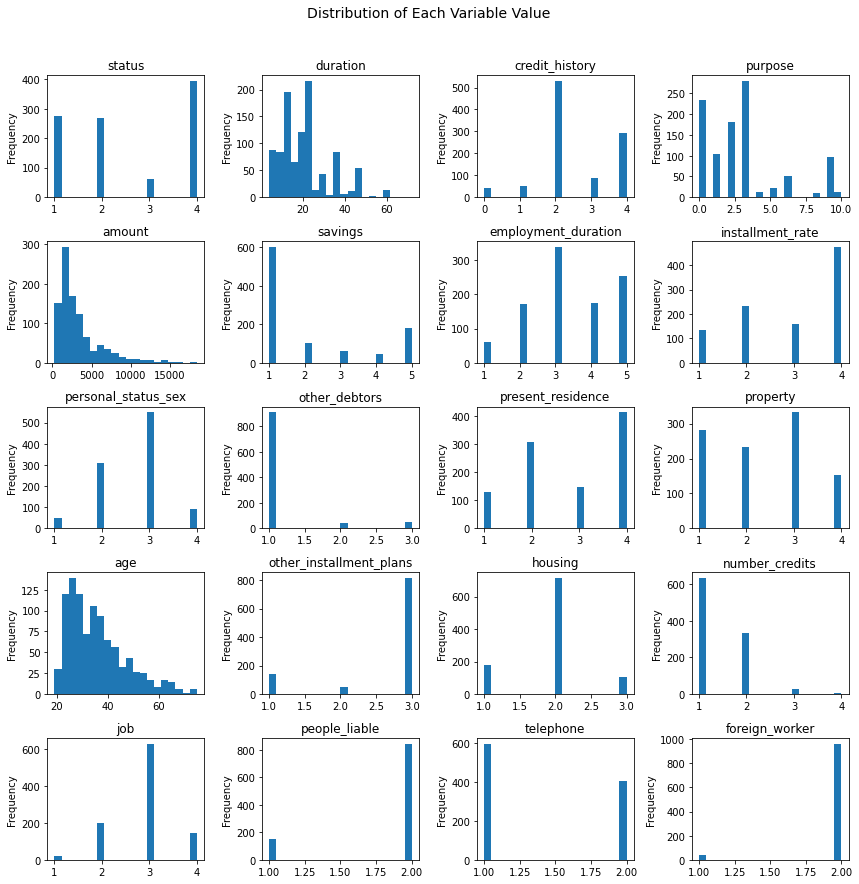

In [12]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))
j = 0
k = 0
for i in df.drop(columns=['credit_risk']).columns:
    df[i].plot(kind='hist', title=i, bins=20, ax=ax[j, k])
    k += 1
    if k == 4:
        j += 1
        k = 0

plt.suptitle('Distribution of Each Variable Value', y=1.02, fontsize=14)
fig.tight_layout()


<AxesSubplot:title={'center':'Credit Risk'}>

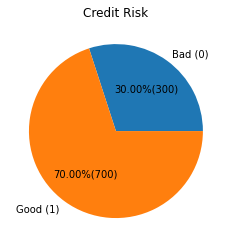

In [13]:
credit_risk_count = df['credit_risk'].value_counts().sort_values()
credit_risk_count.set_axis(['Bad (0)', 'Good (1)'], inplace=True)
credit_risk_count.plot(kind='pie', label='', labels=credit_risk_count.index,
                       autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*credit_risk_count.sum()), title='Credit Risk')


# Data Cleaning

## Outliers

<AxesSubplot:>

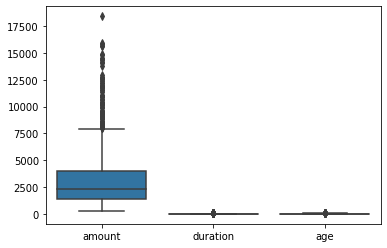

In [14]:
# We only look at numerical variables
sns.boxplot(data=df[numerical_var])


No outliers found

## Duplicated Data

In [15]:
df.duplicated().sum()


0

No duplicated entries

## Missing Data

In [16]:
df.isnull().sum()


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

No missing data found

## Multicollinearity

Text(0.5, 1.0, 'Correlation Heatmap of Ordinal and Numerical Variables')

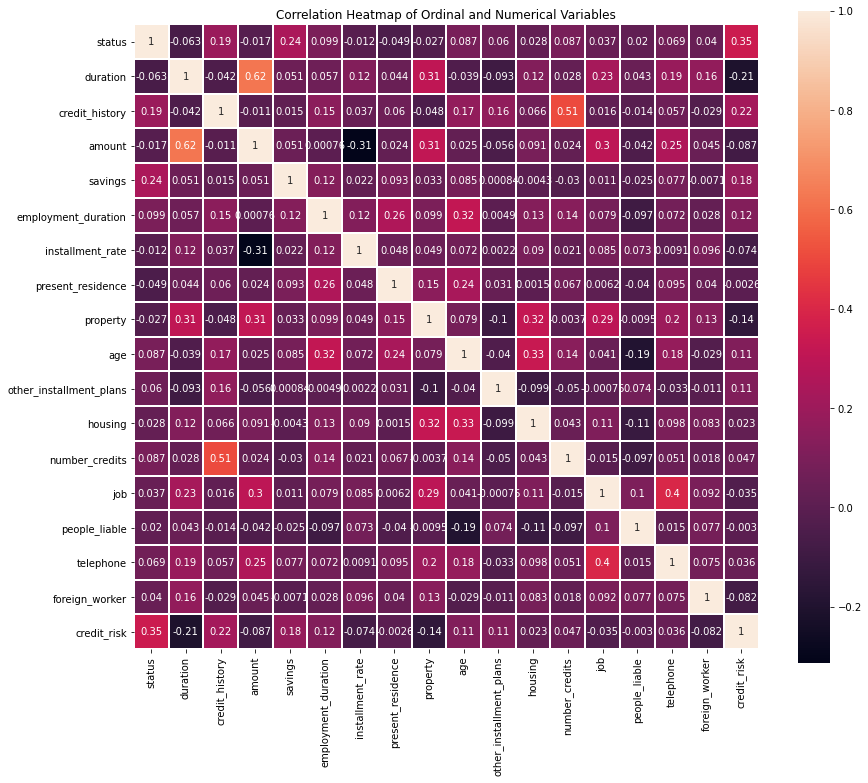

In [17]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.drop(columns=nominal_categorical_var).corr(method="spearman"), linewidths=0.1, vmax=1.0,
            square=True,  linecolor='white', annot=True).set_title("Correlation Heatmap of Ordinal and Numerical Variables")


We set the absolute correlation coefficient of > 0.7 among two variables as the presence of multicollinearity. Therefore, there are no multicollinearity issues in our data.

## Abnormal Data

In [18]:
# Since 'personal_status_sex' has abnormal data structure, we decided to drop it
df.drop('personal_status_sex', axis=1, inplace=True)
nominal_categorical_var.remove('personal_status_sex')


## Export Clean Data

In [35]:
# Export clean data into csv file
df.to_csv("Group 2: Cleaned Data Set.csv", index=False)


# Machine Learning Models

In [20]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
# Oversampling Imbalance Data
from imblearn.over_sampling import SMOTE
# Train-test split
from sklearn.model_selection import train_test_split

# Clustering Model
from kmodes.kmodes import KModes
# Classification Model
from statsmodels.api import Logit

# Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


## Clustering of customer segments

**Elbow Curve to get the right number of Clusters**

Finding the ideal number of clusters to divide the data into is a critical stage in any unsupervised technique. One of the most prominent techniques for figuring out this ideal value of k is the elbow approach.

0   -0.787657
1   -0.167384
2   -0.861381
Name: amount, dtype: float64
0   -0.240857
1   -0.987573
2   -0.738668
Name: duration, dtype: float64
0   -1.281573
1    0.040363
2   -1.105315
Name: age, dtype: float64


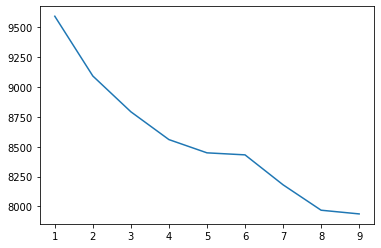

In [21]:
scaler = StandardScaler()
for j in numerical_var:
    df[j] = scaler.fit_transform(np.array(df[j]).reshape((-1, 1)))
    print(df[j].head(3))

df_clus = df.copy()
cost = []
for num_clusters in list(range(1, 10)):
    kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=50, verbose=0)
    kmode.fit_predict(df_clus)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1, 10, 1)])
plt.plot(y, cost)


After visualisation, the desired number of clusters is 5

In [22]:
# Choose k = 5
km_cao = KModes(n_clusters=5, init="Cao", verbose=1)
label = km_cao.fit_predict(df_clus)

df["cluster"] = label


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 174, cost: 8449.0
Run 1, iteration: 2/100, moves: 46, cost: 8449.0


In [23]:
for i in range(5):
    a = df[df["cluster"] == i]["credit_risk"].value_counts()
    print(a)
    print(a[1]/sum(a))


1    372
0    125
Name: credit_risk, dtype: int64
0.7484909456740443
0    92
1    39
Name: credit_risk, dtype: int64
0.29770992366412213
1    100
0     12
Name: credit_risk, dtype: int64
0.8928571428571429
1    106
0     45
Name: credit_risk, dtype: int64
0.7019867549668874
1    83
0    26
Name: credit_risk, dtype: int64
0.7614678899082569


From observation, cluster 1 is having 29.77% of good credit risk users only where other clusters are having a higher percentage of good credit risk. Therefore, we have decided to group other cluster as "cluster 1" and cluster 1 as "cluster 2".

In [24]:
df_2 = df.copy()
df_2["cluster2"] = df_2["cluster"].apply(lambda x: 2 if x != 1 else 1)


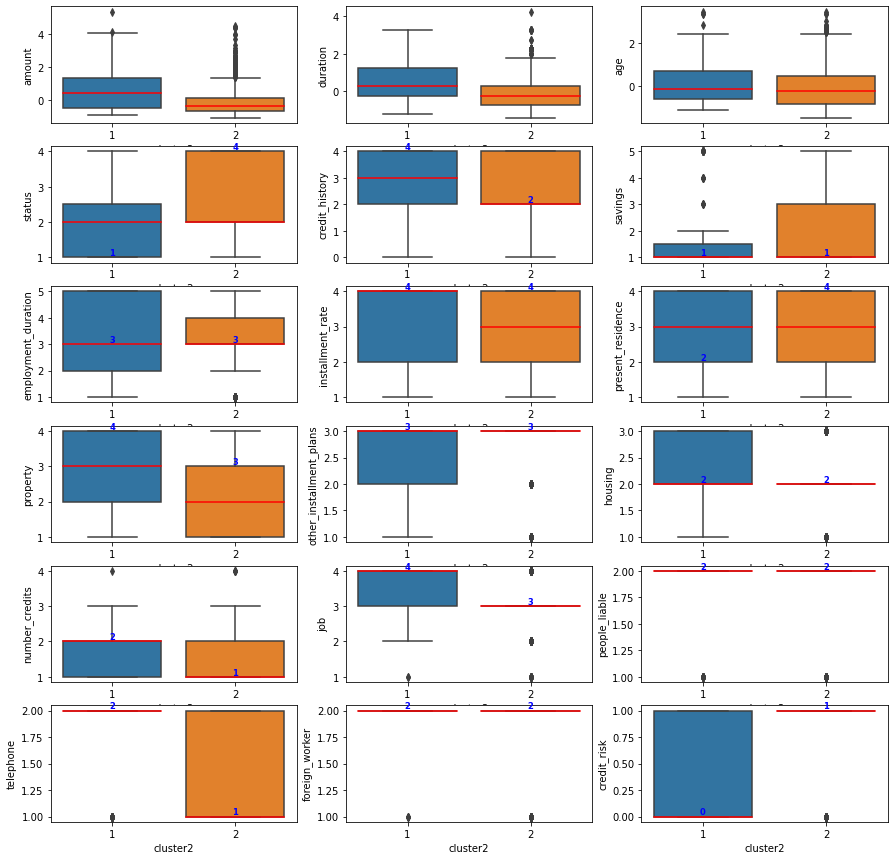

In [25]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
cnt = 0
for j in numerical_var:
    boxPlot = sns.boxplot(y=df_2[j], x=df_2["cluster2"], ax=axes[cnt //
                          3, cnt % 3], medianprops=dict(color="red", alpha=1))
    cnt += 1

for j in list(ordinal_categorical_var):
    boxPlot = sns.boxplot(y=df_2[j], x=df_2["cluster2"], ax=axes[cnt //
                          3, cnt % 3], medianprops=dict(color="red", alpha=1))
    mode = df_2.groupby("cluster2")[j].agg(pd.Series.mode)
    for x in boxPlot.get_xticks():
        boxPlot.text(x, mode[x+1], mode[x+1], horizontalalignment='center',
                     size='small', color='b', weight='semibold', verticalalignment="bottom")
    cnt += 1


From observation of boxplots above, the selected attributes are crdit_history, status, present_residence, property, job, telephone

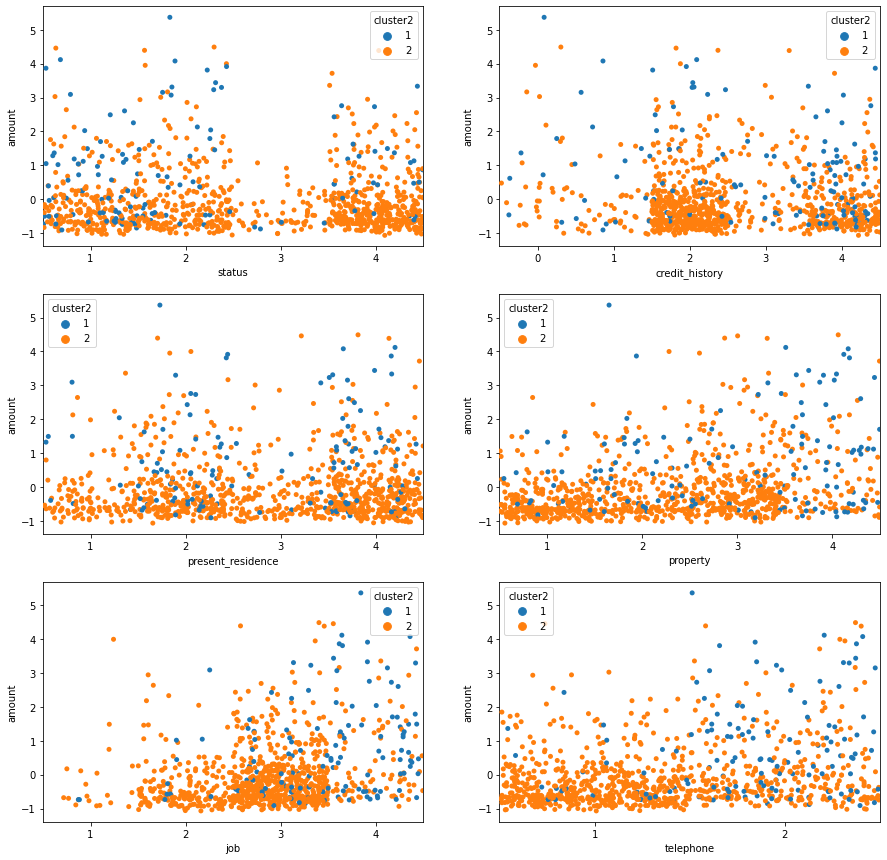

In [26]:
pri = ["status", "credit_history", "present_residence",
       "property", "job", "telephone"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
cnt = 0
for j in pri:
    sns.stripplot(df_2[j], df_2["amount"], hue=df_2["cluster2"],
                  jitter=0.5, ax=axes[cnt//2, cnt % 2])
    cnt += 1


## Classifier of credit risk

In [27]:
X = df.drop(columns='credit_risk', inplace=False)
y = df['credit_risk']

ohe = OneHotEncoder(drop=None, sparse=True, handle_unknown='error')
X['purpose'] = ohe.fit_transform(X['purpose'].values.reshape(-1, 1)).toarray()
X['other_debtors'] = ohe.fit_transform(
    X['other_debtors'].values.reshape(-1, 1)).toarray()


In [28]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [29]:
# Oversampling imbalance data
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)

log_reg = Logit(y_SMOTE, X_SMOTE).fit()


Optimization terminated successfully.
         Current function value: 0.472085
         Iterations 6


In [30]:
print(log_reg.summary())


                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                 1124
Model:                          Logit   Df Residuals:                     1104
Method:                           MLE   Df Model:                           19
Date:                Sun, 21 Aug 2022   Pseudo R-squ.:                  0.3189
Time:                        06:06:14   Log-Likelihood:                -530.62
converged:                       True   LL-Null:                       -779.10
Covariance Type:            nonrobust   LLR p-value:                 2.441e-93
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
status                      0.6917      0.066     10.425      0.000       0.562       0.822
duration                   -0.4182      0.104     -4.033      0.000      -0.621      -0.215


<AxesSubplot:title={'center':'Feature Importance'}>

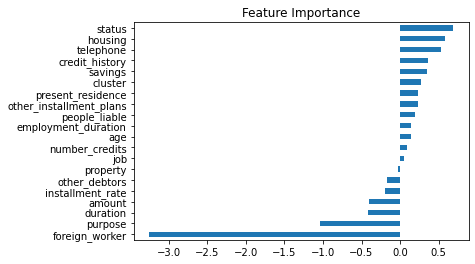

In [31]:
log_reg.params.sort_values().plot(kind='barh', title="Feature Importance")


              precision    recall  f1-score   support

           0       0.55      0.65      0.59        62
           1       0.83      0.76      0.79       138

    accuracy                           0.73       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.74      0.72      0.73       200



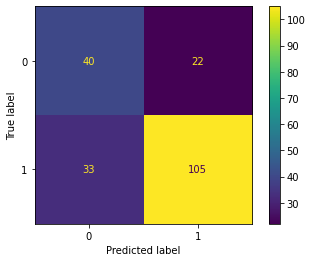

In [32]:
# Perform predictions on the test datdaset
threshold = 0.5
yhat = log_reg.predict(X_test)
prediction = (yhat > threshold).astype(int)

cm = confusion_matrix(y_test, prediction)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Logistic Regression Classification Report
print(classification_report(y_test, prediction))


In [33]:
odds_ratios = pd.DataFrame(
    {
        "Odds_Ratio": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)


                         Odds_Ratio  Lower CI  Upper CI
status                     1.997130  1.753598  2.274482
duration                   0.658214  0.537159  0.806550
credit_history             1.439041  1.223916  1.691977
purpose                    0.356311  0.242655  0.523201
amount                     0.672310  0.540203  0.836722
savings                    1.424562  1.274395  1.592424
employment_duration        1.154790  1.004491  1.327578
installment_rate           0.824613  0.704377  0.965373
other_debtors              0.841502  0.488813  1.448665
present_residence          1.264046  1.088372  1.468075
property                   0.970370  0.817680  1.151574
age                        1.145583  0.952976  1.377119
other_installment_plans    1.262891  1.017237  1.567868
housing                    1.795468  1.310751  2.459436
number_credits             1.087024  0.794737  1.486809
job                        1.054938  0.809684  1.374480
people_liable              1.215425  0.815340  1

<AxesSubplot:title={'center':'Odds Ratio'}>

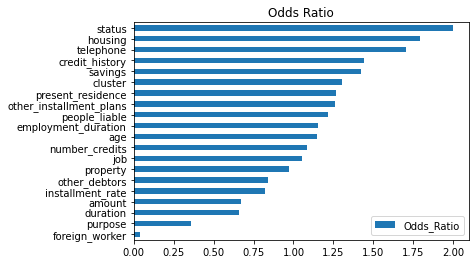

In [34]:
odds_ratios[["Odds_Ratio"]].sort_values(
    by="Odds_Ratio").plot(kind='barh', title="Odds Ratio")
